In [1]:
from qiskit import *
M_simulator = Aer.backends(name="qasm_simulator")[0]
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)


In [2]:
def coin_toss(flips):
    coin_toss.h = circuit.h(qr[0])
    coin_toss.measure = circuit.measure(qr,cr)
    M = execute(circuit, M_simulator, shots=flips).result().get_counts(circuit)
    heads = M['0']
    tails = M['1']
    return heads,tails

In [3]:
def run_coin_toss():
    Heads,Tails = coin_toss(100)
    if(Heads > Tails):
        print('Heads Wins')
    if(Heads < Tails):
        print('Tails Wins')
    if(Heads == Tails):
        print('Both Heads and Tails Wins')
    print('Final Score| Heads:',Heads, 'Tails',Tails)

In [4]:
def run_classical():
    %matplotlib inline
    run_coin_toss()
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(circuit, backend = simulator).result()
    from qiskit.tools.visualization import plot_histogram
    draw_graph = plot_histogram(result.get_counts(circuit))
    return draw_graph

In [5]:
def draw_circuit():
    my_circuit = circuit.draw(output='mpl')
    return my_circuit

Both Heads and Tails Wins
Final Score| Heads: 50 Tails 50


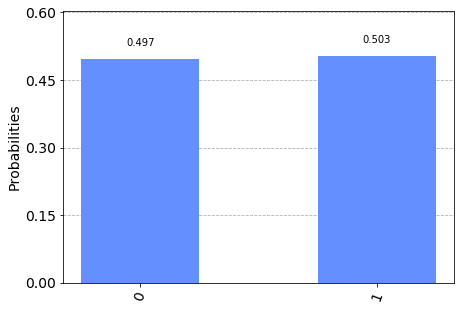

In [8]:
run_classical()

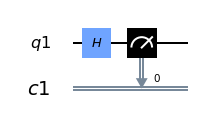

In [18]:
draw_circuit()

In [19]:
def run_quantum():
    %matplotlib inline
    from qiskit.tools.monitor import job_monitor
    from qiskit.tools.visualization import plot_histogram

    IBMQ.load_account()
    provider = IBMQ.get_provider('ibm-q')
    qcomp = provider.get_backend('ibmq_burlington')
    job = execute(circuit, backend=qcomp)
    job_monitor(job)
    result = job.result()
    draw_graph = plot_histogram(result.get_counts(circuit))
    return draw_graph

Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


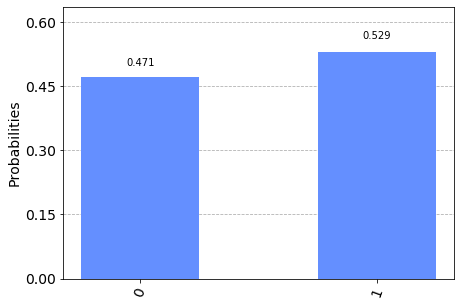

In [20]:
run_quantum()